In [1]:
import scanpy as sc
import matplotlib
import os

In [2]:
pbmc_valid_adata = sc.read("data/data/valid_pbmc.h5ad")
pbmc_train_adata = sc.read("data/data/train_pbmc.h5ad")
hpoly_valid_adata = sc.read("data/data/valid_hpoly.h5ad")
hpoly_train_adata = sc.read("data/data/train_hpoly.h5ad")
study_valid_adata = sc.read("data/data/valid_study.h5ad")
study_train_adata = sc.read("data/data/train_study.h5ad")
scperb_pbmc_adata = sc.read("data/scperb_pbmc_all_data.h5ad")
scperb_hpoly_adata = sc.read("data/scperb_hpoly_all_data.h5ad")
scperb_study_adata = sc.read("data/scperb_study_all_data.h5ad")
scgen_pbmc_adata = sc.read("data/scgen_pbmc_all_data.h5ad")
scgen_hpoly_adata = sc.read("data/scgen_hpoly_all_data.h5ad")
scgen_study_adata = sc.read("data/scgen_study_all_data.h5ad")

/opt/conda/lib/python3.7/site-packages/anndata/compat/__init__.py:235: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/anndata/compat/__init__.py:235: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
def get_name(name):
    name = name[:5]
    condition = {
        "stim": "stimulated",
        "pred": "pred",
        "ctrl": "control",
        "cell_type_key": "cell_type",
    }
    if name == 'pbmc_':
        condition = {
            "stim": "stimulated",
            "pred": "pred",
            "ctrl": "control",
            "cell_type_key": "cell_type",
        }
    elif name == 'hpoly':
        condition = {
            "stim": "Hpoly.Day10",
            "pred": "pred",
            "ctrl": "Control",
            "cell_type_key": "cell_label",
        }
    elif name == 'study':
        condition = {
            "stim": "stimulated",
            "pred": "pred",
            "ctrl": "control",
            "cell_type_key": "cell_type",
        }
    else:
        condition = {
            "stim": "stimulated",
            "pred": "pred",
            "ctrl": "control",
            "cell_type_key": "cell_type",
        }
        
    return condition

In [4]:
def get_diff_genes(adata, name):
    conditions = get_name(name)
    sc.tl.rank_genes_groups(adata, groupby="condition", n_genes=100, method="wilcoxon")
    diff_genes = adata.uns["rank_genes_groups"]["names"][conditions["stim"]].tolist()[:50] + adata.uns["rank_genes_groups"]["names"][conditions["ctrl"]].tolist()[:50]
    return diff_genes

In [5]:
def plot_umap(adata, name):
#     adata = adata[~(adata.obs['condition'] == 'stimulated')]
#     print(adata.obs['condition'])
    diff_genes = get_diff_genes(adata, name)
    print(diff_genes[0])
    conditions = get_name(name)
    matplotlib.rcParams.update(matplotlib.rcParamsDefault)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    sc.pl.umap(adata, color = [conditions['cell_type_key']], title=f"cell type {name}", frameon=True, palette=matplotlib.rcParams["axes.prop_cycle"], legend_fontsize=18, save =f"_{name}_celltype.pdf")
    sc.pl.umap(adata, color = [diff_genes[0]], title=f"{diff_genes[0]} {name}", frameon=True, palette=matplotlib.rcParams["axes.prop_cycle"], legend_fontsize=14, save =f"_{name}_{diff_genes[0]}.pdf")


In [6]:
# plot_umap(pbmc_valid_adata, "pbmc_valid")
# plot_umap(pbmc_train_adata, "pbmc_train")
# plot_umap(hpoly_valid_adata, "hpoly_valid")
# plot_umap(hpoly_train_adata, "hpoly_train")
# plot_umap(study_valid_adata, "study_valid")
# plot_umap(study_train_adata, "study_train")

IFI6
         Falling back to preprocessing with `sc.pp.pca` and default params.


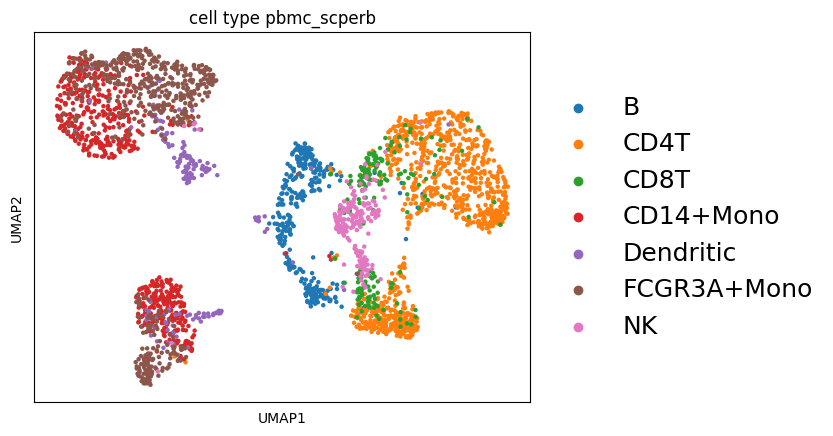

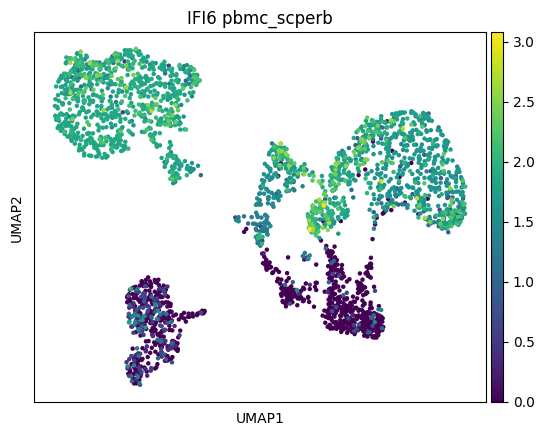

Defa24
         Falling back to preprocessing with `sc.pp.pca` and default params.


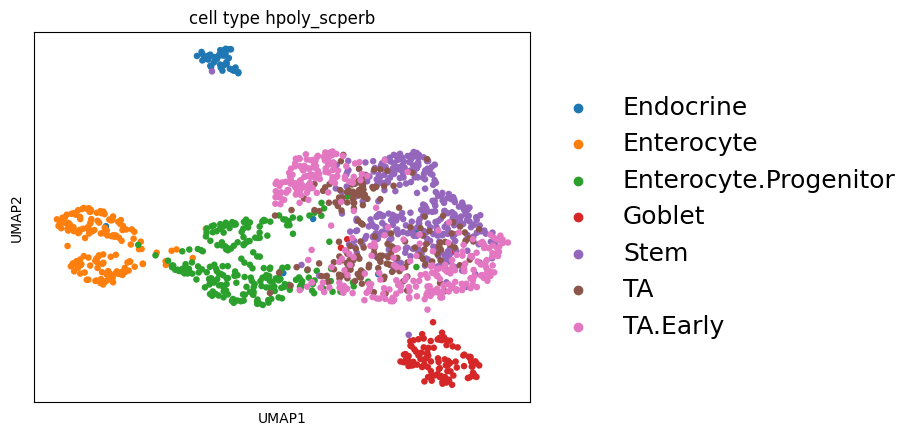

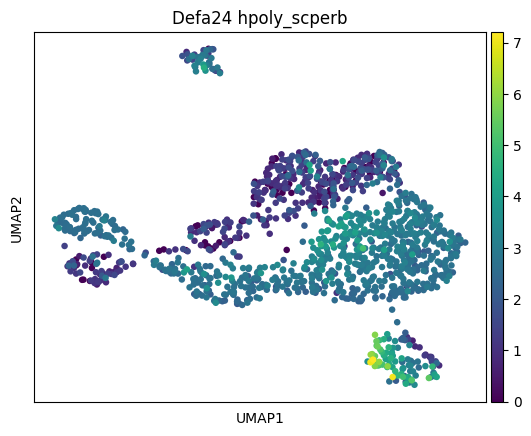

IFIT3
         Falling back to preprocessing with `sc.pp.pca` and default params.


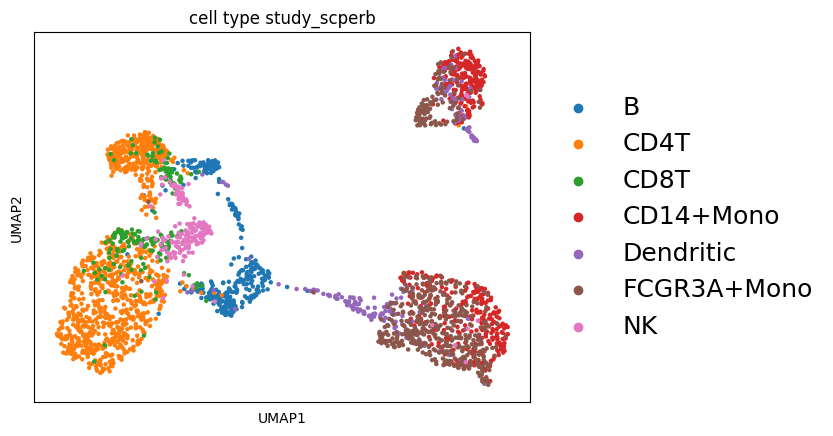

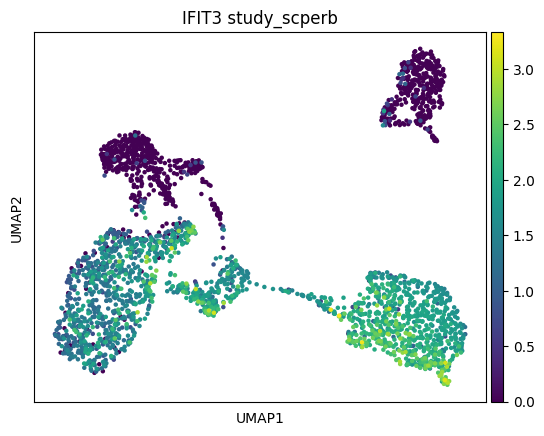

In [7]:
plot_umap(scperb_pbmc_adata, "pbmc_scperb")
plot_umap(scperb_hpoly_adata, "hpoly_scperb")
plot_umap(scperb_study_adata, "study_scperb")

In [8]:
# import numpy as np
ctrl_pbmc = scperb_pbmc_adata[scperb_pbmc_adata.obs['condition'] == 'control']
ctrl_pbmc[:,"IFI6"].X.mean()

0.15038416

In [9]:
pred_pbmc = scperb_pbmc_adata[scperb_pbmc_adata.obs['condition'] == 'pred']
pred_pbmc[:,"IFI6"].X.mean()

1.7168136

IFI6


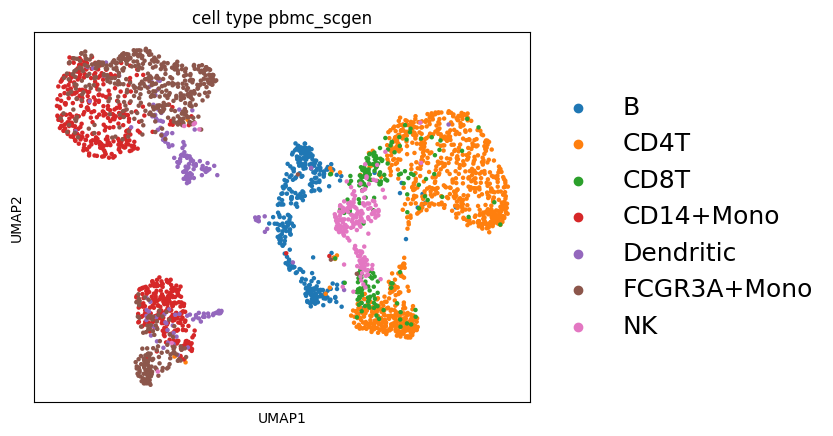

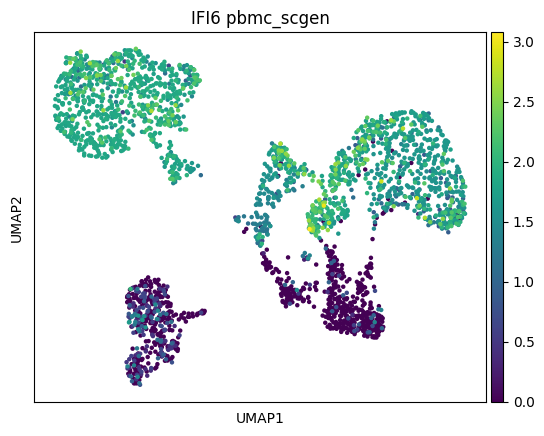

Defa24


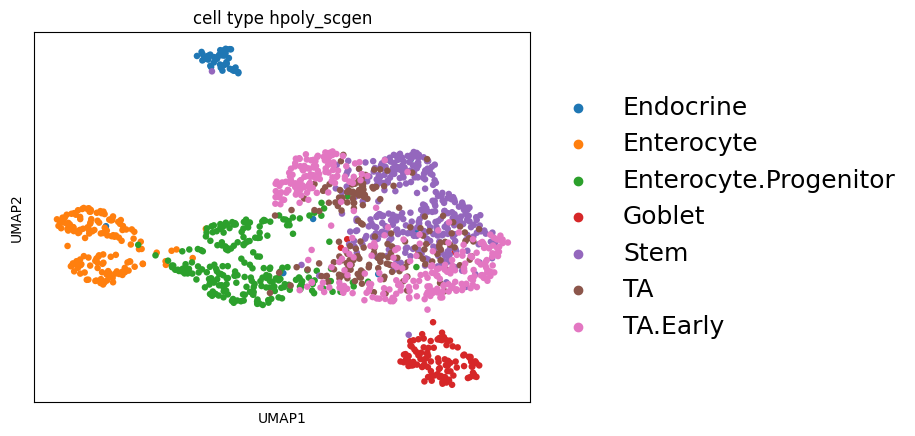

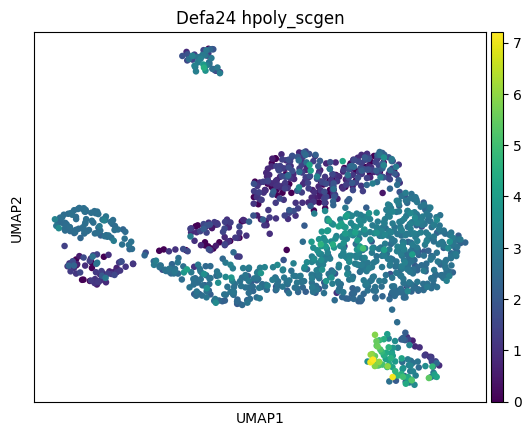

IFIT3


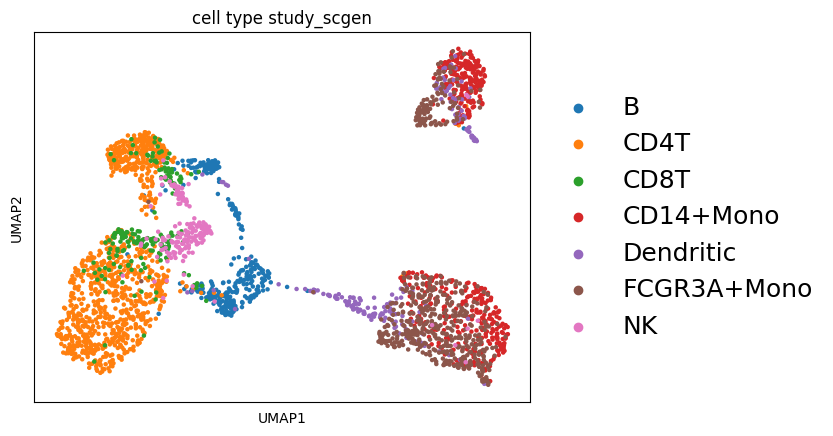

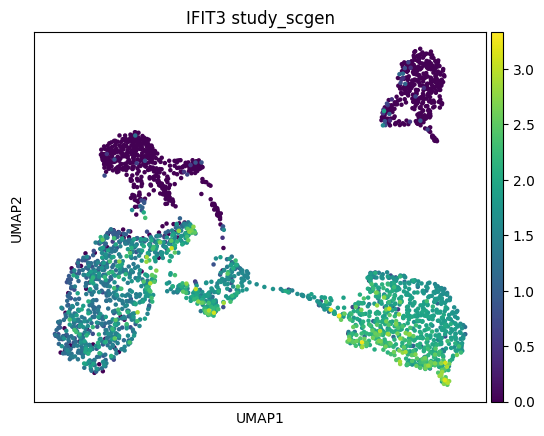

In [10]:
plot_umap(scperb_pbmc_adata, "pbmc_scgen")
plot_umap(scperb_hpoly_adata, "hpoly_scgen")
plot_umap(scperb_study_adata, "study_scgen")